In [2]:
import pandas as pd
import numpy as np
import math, copy

In [3]:
df_model = pd.read_csv("data/df_model.csv")
df_model

,Age,Family size,latitude,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Negative
0,0.133333,0.6,0.0,0.000000,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
1,0.400000,0.4,0.0,0.074074,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,0.266667,0.4,0.0,0.148148,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1
3,0.266667,1.0,0.0,0.166667,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
4,0.266667,0.6,0.0,0.083333,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.333333,0.2,0.0,0.000000,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
384,0.333333,0.6,0.0,0.435185,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
385,0.266667,0.8,0.0,0.083333,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
386,0.333333,0.2,0.0,0.074074,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0


# Modeling - Manual Multiple Logistic Regression

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(df_model, test_size=0.3, random_state=98)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [6]:
train_columns = df_model.drop('Feedback_Negative', axis=1).columns
target_column = 'Feedback_Negative'

x_train = train[train_columns]
y_train = train[target_column]

x_test = test[train_columns]
y_test = test[target_column]

## Sigmoid or Logistic Function
- We start by using our linear regression model, $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, to predict $y$ given $x$. 
- However, we would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1. 
- This can be accomplished by using a "sigmoid function" which maps all input values to values between 0 and 1. 


### Formula for Sigmoid function

The formula for a sigmoid function is as follows -  

### $$g(z) = \frac{1}{1+e^{-z}}$$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 
- The implementation of the sigmoid function should cover both of these potential input formats.

## Logistic Regression
 A logistic regression model applies the sigmoid to the linear regression model:

### $$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$ 

  where

### $$g(z) = \frac{1}{1+e^{-z}}$$

# 
* We interpret the output of the model ($f_{\mathbf{w},b}(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model, we can use the following heuristic :

####  if $f_{\mathbf{w},b}(x) >= 0.5$, predict $y=1$
  
####  if $f_{\mathbf{w},b}(x) < 0.5$, predict $y=0$

## Decision Boundary

$g(z) >= 0.5$ for $z >=0$

* For a logistic regression model, $z = \mathbf{w} \cdot \mathbf{x} + b$. Therefore,

  if $\mathbf{w} \cdot \mathbf{x} + b >= 0$, the model predicts $y=1$
  
  if $\mathbf{w} \cdot \mathbf{x} + b < 0$, the model predicts $y=0$

<figure>
     <center><img src="imgs/decision_boundary-2.png"  style="width:600px;height:300px;"></center>
</figure>

<figure>
     <center><img src="imgs/decision_boundary.png"  style="width:600px;height:300px;"></center>
</figure>

## Cost Function
 Logistic regression use the **Logistic Loss Function**, because when using squared error cost, the curve becomes non-convex, impairing the calculation to arrive at the global minimum.

<figure>
     <center><img src="imgs/img-3.png"  style="width:900px;height:300px;"></center>
</figure>

* **Loss** is a measure of the difference of a single example to its target value
* **Cost** is a measure of the losses over the training set


This is defined: 
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}\end{equation}

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

<figure>
     <center><img src="imgs/loss.png"  style="width:900px;height:300px;"></center>
</figure>

* When y=1, the closer to 1, the smaller the error.
* When y=0, the closer to 1, the grater the error.

#### The **Loss Function** can be rewritten to be easier to implement.
$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$


## **The Cost Function** : 


$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

In [7]:
def sigmoid(z):

    # np.exp : way to calculate the exponential (e^z) of all elements in the input array (z)
    g = 1 / (1 + np.exp(-z))

    return g

In [8]:
def compute_cost_logistic (x, y, w, b):
    
    m = x.shape[0]
    cost = 0.0

    for i in range(m):

        # z = linear regression
        z_i = np.dot(x.iloc[i], w) + b

        # Compute sigmoid function
        f_wb_i = sigmoid(z_i)

        # Compute the cost. 
        # If y=0 : -y[i] * np.log(f_wb_i) = 0, and the equation will be - (1 - y[i]) * np.log(1 - f_wb_i)
        # If y=1 : -(1 - y[i]) * np.log(1 - f_wb_i) = 0, and the equation will be -y[i] * np.log(f_wb_i)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
    
    cost = cost / m

    return cost

In [9]:
x_train.shape

(271, 19)

In [10]:
w_tmp = np.repeat(1, 19).tolist()
b_tmp = 0

print(compute_cost_logistic(x_train, y_train, w_tmp, b_tmp))

4.845841540539585


## **The Optimization of the Cost Function : Logistic Gradient Descent**


## **Gradient Descent with Multiple Variables**


$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [11]:
def compute_gradient_logistic (x, y, w, b) : 

    # m = examples os training dataset, n = number of features 
    m, n = x.shape

    # List of partial derivates of parameters
    dj_dw = np.zeros((n, ))

    # Partial derivate of intercept
    dj_db = 0

    # First Looping : Compute the mean of partial derivate of all examples
    for i in range(m) :

        # First : Compute the error of prediction
        f_wb_i = sigmoid( np.dot(x.iloc[i], w) + b ) # prediction
        err_i = f_wb_i - y[i] # error

        # Second Loop intern : Compute the partial derivate for each feature and add them.
        for j in range (n):

            #partial derivate = err * x[i, j]
            dj_dw[j] = dj_dw[j] + err_i * x.iloc[i, j]
        
        # Compute the partial derivate of intercept
        dj_db = dj_db + err_i
    
    # Mean of Partial Derivates of all parameters across all examples
    dj_dw = dj_dw / m

    # Mean of Partial Derivates of intercept across all examples
    dj_db = dj_db / m

    return dj_db, dj_dw

In [12]:
def gradient_descent (x, y, w_in, b_in, alpha, num_iters):

    # Performs batch gradient descent to learn w and b. Updates w and b by taking num_iters gradient steps with learning rate alpha

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []

    # Avoid modifying global w within function
    w = copy.deepcopy(w_in)

    b = b_in

    # Gradient Descent looping
    for i in range(num_iters):

        #Calculate the gradients
        dj_db, dj_dw = compute_gradient_logistic(x, y, w, b)

        #Update parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        #Save cost J at each iteration
        if i<100000:    #prevent resource exhaustion

            J_history.append(compute_cost_logistic(x, y, w, b))
        
        #Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d} : Cost {J_history[-1]:0.4f} ")
    
    #return final w, b and J history for graphing
    return w, b, J_history

## **Run the Optimazation Model with Gradient Descent**

In [13]:
w_tmp = np.repeat(1, 19).tolist()
b_tmp = 0
alpha = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(x_train, y_train, w_tmp, b_tmp, alpha, iters)
print(f"\nUpdated parameters: w:{w_out}, b:{b_out}")

Iteration    0 : Cost 4.5614 
Iteration 1000 : Cost 0.2974 
Iteration 2000 : Cost 0.2901 
Iteration 3000 : Cost 0.2874 
Iteration 4000 : Cost 0.2858 
Iteration 5000 : Cost 0.2847 
Iteration 6000 : Cost 0.2838 
Iteration 7000 : Cost 0.2831 
Iteration 8000 : Cost 0.2825 
Iteration 9000 : Cost 0.2821 

Updated parameters: w:[ 0.75266843 -0.274996    0.64998835 -0.16352783 -0.03614532  1.26541845
  0.12926411 -0.99668077  0.36011871  0.27028156  0.72163197  2.45719312
 -0.44006994 -0.30141558 -0.14067292 -0.75510465 -0.0716969   3.28307586
 -2.98828395], b:-0.26750545358490313


## **Model Validation : train dataset** 

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, log_loss, cohen_kappa_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
threshold = 0.5

In [49]:
y_pred = (np.dot(x_train, w_out) + b_out).round(3)

y_pred_binary = np.where(y_pred >= threshold, 1, 0)

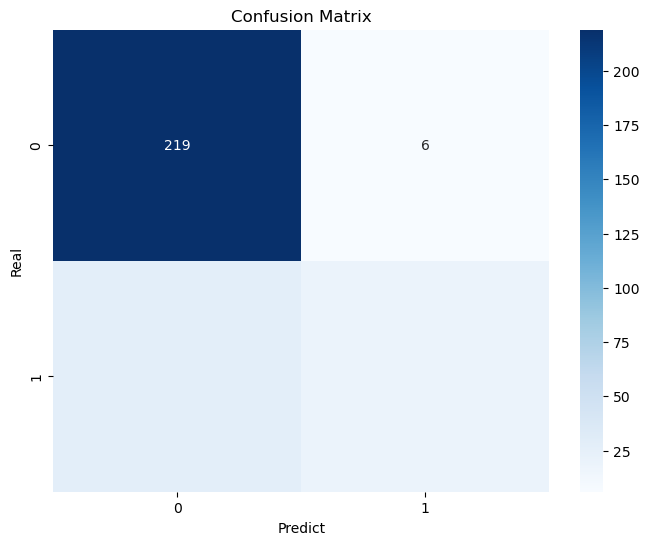

In [54]:
cm = confusion_matrix(y_train, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

In [32]:
cm

array([[219,   6],
       [ 27,  19]], dtype=int64)

In [55]:
print(classification_report(y_train, y_pred_binary))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       225
           1       0.76      0.41      0.54        46

    accuracy                           0.88       271
   macro avg       0.83      0.69      0.73       271
weighted avg       0.87      0.88      0.86       271



In [57]:
roc_auc = roc_auc_score(y_train, y_pred_binary)
logloss = log_loss(y_train, y_pred_binary)
cohen_kappa = cohen_kappa_score(y_train, y_pred_binary)

print("Area under the ROC Curve (AUC-ROC):", roc_auc)
print("Log Loss:", logloss)
print("index Cohen Kappa:", cohen_kappa)

Area under the ROC Curve (AUC-ROC): 0.6931884057971015
Log Loss: 4.389079563988435
index Cohen Kappa: 0.47210908446962996


# Sklearn Logistic Regression : Gradient Descent

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression()

In [60]:
model.fit(x_train, y_train)

LogisticRegression()

In [61]:
y_pred_sklearn = model.predict(x_train)

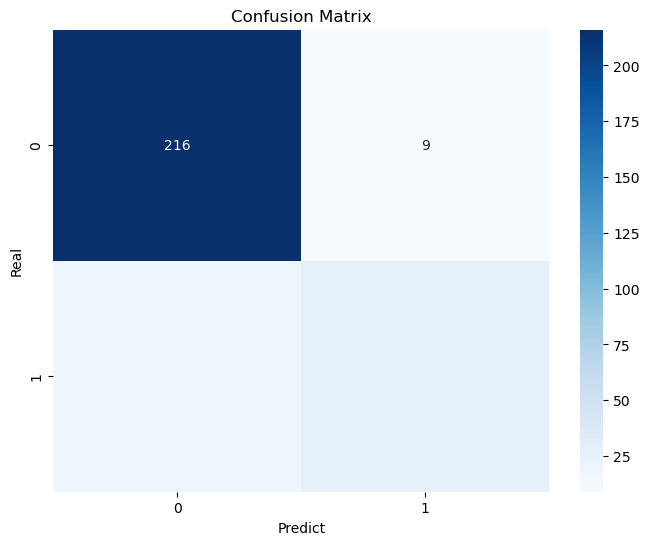

In [63]:
cm_2 = confusion_matrix(y_train, y_pred_sklearn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

In [64]:
cm_2

array([[216,   9],
       [ 19,  27]], dtype=int64)

In [65]:
print(classification_report(y_train, y_pred_sklearn))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       225
           1       0.75      0.59      0.66        46

    accuracy                           0.90       271
   macro avg       0.83      0.77      0.80       271
weighted avg       0.89      0.90      0.89       271



In [66]:
roc_auc = roc_auc_score(y_train, y_pred_sklearn)
logloss = log_loss(y_train, y_pred_sklearn)
cohen_kappa = cohen_kappa_score(y_train, y_pred_sklearn)

print("Area under the ROC Curve (AUC-ROC):", roc_auc)
print("Log Loss:", logloss)
print("index Cohen Kappa:", cohen_kappa)

Area under the ROC Curve (AUC-ROC): 0.7734782608695652
Log Loss: 3.7240675088386723
index Cohen Kappa: 0.5987308302485458
